## 第三章 模型搭建和评估--建模

经过前面的两章的知识点的学习，我可以对数数据的本身进行处理，比如数据本身的增删查补，还可以做必要的清洗工作。那么下面我们就要开始使用我们前面处理好的数据了。这一章我们要做的就是使用数据，我们做数据分析的目的也就是，运用我们的数据以及结合我的业务来得到某些我们需要知道的结果。那么分析的第一步就是建模，搭建一个预测模型或者其他模型；我们从这个模型的到结果之后，我们要分析我的模型是不是足够的可靠，那我就需要评估这个模型。今天我们学习建模，下一节我们学习评估。

我们拥有的泰坦尼克号的数据集，那么我们这次的目的就是，完成泰坦尼克号存活预测这个任务。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (10, 6)  # 设置输出图片大小

载入这些库，如果缺少某些库，请安装他们

【思考】这些库的作用是什么呢？你需要查一查

<div class="alert alert-block alert-success">
pandas和numpy用于数据分析；matplotlib、seaborn库和Image模块是用于绘制图片及相关操作 </div>

 **载入我们提供清洗之后的数据(clear_data.csv)，大家也将原始数据载入（train.csv），说说他们有什么不同**

In [4]:
# 读入原始数据
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 读入清洗后的数据
data = pd.read_csv('clear_data.csv')
data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,2,3,26.0,0,0,7.9250,1,0,0,0,1
3,3,1,35.0,1,0,53.1000,1,0,0,0,1
4,4,3,35.0,0,0,8.0500,0,1,0,0,1


<div class="alert alert-block alert-success">
清洗过后的数据省去了Sex、SibSp等无关的列，也对Sex和Embarked做了编码处理。</div>

### 模型搭建

* 处理完前面的数据我们就得到建模数据，下一步是选择合适模型
* 在进行模型选择之前我们需要先知道数据集最终是进行**监督学习**还是**无监督学习**
* 模型的选择一方面是通过我们的任务来决定的。
* 除了根据我们任务来选择模型外，还可以根据数据样本量以及特征的稀疏性来决定
* 刚开始我们总是先尝试使用一个基本的模型来作为其baseline，进而再训练其他模型做对比，最终选择泛化能力或性能比较好的模型

这里我的建模，并不是从零开始，自己一个人完成完成所有代码的编译。我们这里使用一个机器学习最常用的一个库（sklearn）来完成我们的模型的搭建

**sklearn的算法选择路径供大家参考（略）**

【思考】数据集哪些差异会导致模型在拟合数据是发生变化

<div class="alert alert-block alert-danger">
暂时未能总结。 </div>


#### 任务一：切割训练集和测试集
这里使用留出法划分数据集

* 将数据集分为自变量和因变量
* 按比例切割训练集和测试集(一般测试集的比例有30%、25%、20%、15%和10%)
* 使用分层抽样
* 设置随机种子以便结果能复现

【思考】
* 划分数据集的方法有哪些？
* 为什么使用分层抽样，这样的好处有什么？

<div class="alert alert-block alert-success">
还可以采用其他随机抽样方法；分层抽样可以保持样本的结构，同时也可以对各层内部进行分析。 </div>

#### 任务提示1
* 切割数据集是为了后续能评估模型泛化能力
* sklearn中切割数据集的方法为`train_test_split`
* 查看函数文档可以在jupyter noteboo里面使用`train_test_split?`后回车即可看到
* 分层和随机种子在参数里寻找

要从clear_data.csv和train.csv中提取train_test_split()所需的参数

In [6]:
from sklearn.model_selection import train_test_split
X = data
y = train['Survived']
# 对数据集进行切割
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

X_train.shape, X_test.shape

((668, 11), (223, 11))

【思考】
* 什么情况下切割数据集的时候不用进行随机选取

<div class="alert alert-block alert-danger">
暂时未能解决 </div>


#### 任务二：模型创建
* 创建基于线性模型的分类模型（逻辑回归）
* 创建基于树的分类模型（决策树、随机森林）
* 分别使用这些模型进行训练，分别的到训练集和测试集的得分
* 查看模型的参数，并更改参数值，观察模型变化

#### 提示
* 逻辑回归不是回归模型而是分类模型，不要与`LinearRegression`混淆
* 随机森林其实是决策树集成为了降低决策树过拟合的情况
* 线性模型所在的模块为`sklearn.linear_model`
* 树模型所在的模块为`sklearn.ensemble`

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [8]:
# 默认参数逻辑回归模型
lr = LogisticRegression()
lr.fit(X_train, y_train)
# 查看训练集和测试集score值
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.80
Testing set score: 0.79


C:\Users\shepherd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# 调整参数后的逻辑回归模型
lr2 = LogisticRegression(C=100)
lr2.fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr2.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(lr2.score(X_test, y_test)))

Training set score: 0.79
Testing set score: 0.78


C:\Users\shepherd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# 默认参数的随机森林分类模型
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print("Training set score: {:.2f}".format(rfc.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(rfc.score(X_test, y_test)))

Training set score: 1.00
Testing set score: 0.82


In [11]:
rfc2 = RandomForestClassifier(n_estimators=100, max_depth=5)
rfc2.fit(X_train, y_train)
print("Training set score: {:.2f}".format(rfc2.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(rfc2.score(X_test, y_test)))

Training set score: 0.86
Testing set score: 0.82


【思考】
* 为什么线性模型可以进行分类任务，背后是怎么的数学关系
* 对于多分类问题，线性模型是怎么进行分类的

<div class="alert alert-block alert-success">
个人认为：所谓线性模型进行分类任务是在借助类似逻辑回归的方式之后实现；而多分类在逻辑回归方法下，再选择用于拟合的线性函数 </div>

#### 任务三：输出模型预测结果
* 输出模型预测分类标签
* 输出不同分类标签的预测概率

#### 提示3
* 一般监督模型在sklearn里面有个`predict`能输出预测标签，`predict_proba`则可以输出标签概率

In [12]:
pred = lr.predict(X_train)
pred[: 10]

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [13]:
pred_proba = lr.predict_proba(X_train)
pred_proba[:10]

array([[0.60836719, 0.39163281],
       [0.17813552, 0.82186448],
       [0.40992557, 0.59007443],
       [0.19005524, 0.80994476],
       [0.87986445, 0.12013555],
       [0.91371786, 0.08628214],
       [0.13316392, 0.86683608],
       [0.90616268, 0.09383732],
       [0.05311263, 0.94688737],
       [0.10966138, 0.89033862]])

【思考】
* 预测标签的概率对我们有什么帮助

<div class="alert alert-block alert-danger">
predict_proba表示标签取值的概率，如第一个数据中，取0的概率未0.60836719、取1的概率为0.39163281。作用暂时不知道。 </div>

## 第三章 模型搭建和评估-评估

根据之前的模型的建模，我们知道如何运用sklearn这个库来完成建模，以及我们知道了的数据集的划分等等操作。那么一个模型我们怎么知道它好不好用呢？以至于我们能不能放心的使用模型给我的结果呢？那么今天的学习的评估，就会很有帮助。

### 模型评估

* 模型评估是为了知道模型的泛化能力。
* 交叉验证（cross-validation）是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定、全面。
* 在交叉验证中，数据被多次划分，并且需要训练多个模型。
* 最常用的交叉验证是 k 折交叉验证（k-fold cross-validation），其中 k 是由用户指定的数字，通常取 5 或 10。
* 准确率（precision）度量的是被预测为正例的样本中有多少是真正的正例
* 召回率（recall）度量的是正类样本中有多少被预测为正类
* f-分数是准确率与召回率的调和平均

#### 任务一：交叉验证
* 用10折交叉验证来评估之前的逻辑回归模型
* 计算交叉验证精度的平均值

#### 提示4
* 交叉验证在sklearn中的模块为`sklearn.model_selection`

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
lr = LogisticRegression(C=100)
scores = cross_val_score(lr, X_train, y_train, cv=10)

# k折交叉验证分数
scores

C:\Users\shepherd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shepherd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

array([0.82089552, 0.74626866, 0.74626866, 0.80597015, 0.88059701,
       0.8358209 , 0.76119403, 0.82089552, 0.74242424, 0.75757576])

In [16]:
# 平均交叉验证分数
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.79


#### 思考4
* k折越多的情况下会带来什么样的影响？

<div class="alert alert-block alert-info"> 
自认为，k折的选择既要兼顾模型的精度，又要注意时间、空间的成本。 </div>

#### 任务二：混淆矩阵
* 计算二分类问题的混淆矩阵
* 计算精确率、召回率以及f-分数

【思考】什么是二分类问题的混淆矩阵，理解这个概念，知道它主要是运算到什么任务中的

<div class="alert alert-block alert-success">
根据混淆矩阵计算准确率、TRP和FPR等指标用于评价模型的预测能力 </div>

#### 提示5
* 混淆矩阵的方法在sklearn中的`sklearn.metrics`模块
* 混淆矩阵需要输入真实标签和预测标签
* 精确率、召回率以及f-分数可使用`classification_report`模块

In [18]:
from sklearn.metrics import confusion_matrix

# 训练模型
lr = LogisticRegression(C=100)
lr.fit(X_train, y_train)

C:\Users\shepherd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

In [19]:
# 模型预测结果
pred = lr.predict(X_train)

# 混淆矩阵
confusion_matrix(y_train, pred)

array([[354,  58],
       [ 83, 173]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report

# 精确率、召回率以及f1-score
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       412
           1       0.75      0.68      0.71       256

    accuracy                           0.79       668
   macro avg       0.78      0.77      0.77       668
weighted avg       0.79      0.79      0.79       668



【思考】
* 如果自己实现混淆矩阵的时候该注意什么问题

<div class="alert alert-block alert-success">
对阈值的选择 </div>

#### 任务三：ROC曲线
* 绘制ROC曲线

【思考】什么是ROC曲线，ROC曲线的存在是为了解决什么问题？

<div class="alert alert-block alert-success">
用于监测阈值下的识别能力 </div>

#### 提示6
* ROC曲线在sklearn中的模块为`sklearn.metrics`
* ROC曲线下面所包围的面积越大越好

In [21]:
from sklearn.metrics import roc_curve

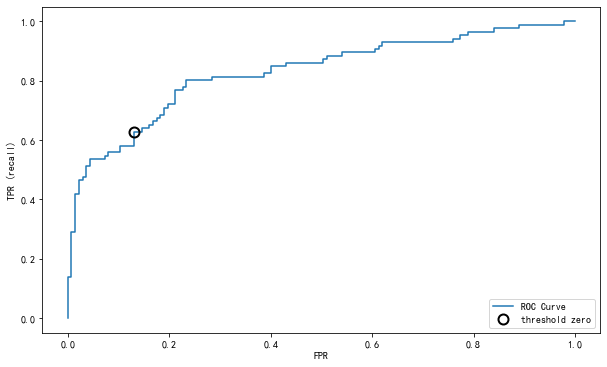

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### 思考6
* 对于多分类问题如何绘制ROC曲线

<div class="alert alert-block alert-success">
可对标签进行分类，但我目前不能实现。 </div>

【思考】你能从这条ROC曲线的到什么信息？这些信息可以做什么？

<div class="alert alert-block alert-success">
曲线下方的面积是AUC值，这个数值越大越好！ </div>
